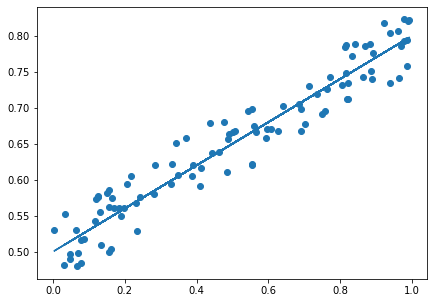

epoch=0, w=0.8565842320887628, b=-0.3988842599175644, error=0.46649764566607993
epoch=10, w=0.9468080903694376, b=-0.16016643059885827, error=0.16926914957326422
epoch=20, w=0.979860863421828, b=-0.029124898235235036, error=0.0863484821929694
epoch=30, w=0.9838299822207537, b=0.04588525014685221, error=0.061117678410901405
epoch=40, w=0.9732382434485599, b=0.0916139782388149, error=0.051574577770820314
epoch=50, w=0.9555860538365218, b=0.12192141249662095, error=0.04644319264728772
epoch=60, w=0.9347386686486862, b=0.14399353987720137, error=0.042685471874277355
epoch=70, w=0.9126799175543497, b=0.16156041851244757, error=0.039472829780137164
epoch=80, w=0.8904201755044658, b=0.17656242998248345, error=0.03657002074853511
epoch=90, w=0.868466442422685, b=0.19001299997491652, error=0.03390182932040256
epoch=100, w=0.8470657043755171, b=0.2024452875460096, error=0.03143684126387785
epoch=110, w=0.8263309114612972, b=0.21414347239301568, error=0.029156219321722476
epoch=120, w=0.806306181

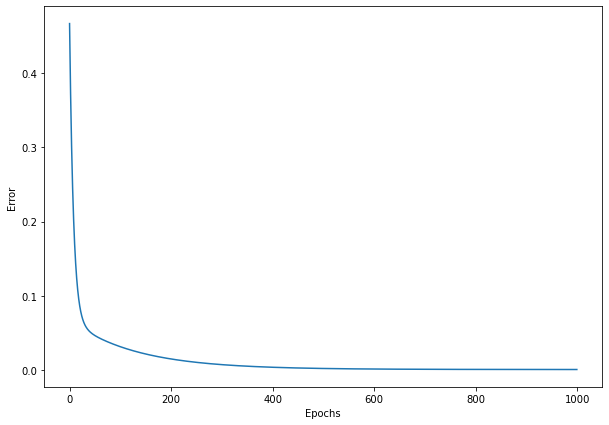

In [13]:
# 단항식(단순 선형 회귀)에서의 경사하강법

import numpy as np
import torch
import matplotlib.pyplot as plt

# 0) 데이터 생성
x = np.random.rand(100)  # 0~1 사이의 균일분포에서 난수 100개 생성
real_y = 0.3*x + 0.5  # y=0.3x+0.5 선형 그래프 만들기
noise = np.random.uniform(-0.05, 0.05, 100)  # 균등분포에서 난수 100개 생성
y = real_y + noise

plt.figure(figsize=(7,5))
plt.scatter(x,y)
plt.plot(x,real_y)
plt.show()

# 1) 예측 함수 정의 및 파라미터 초기화
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
y_hat = w*x + b

lr = 0.05  # learning rate 초기화
num_epoch = 1000  # epoch 횟수 설정


# 2) 경사하강법
errors = []

for i in range(num_epoch):
    y_hat = w*x + b
    
    error = ((y_hat-y) ** 2).mean()  # error 계산 (MSE loss)
    if error < 0.0005:
        break
    
    # 각 파라미터에 대한 미분값(기울기) 구하기 
    w_diff = ((y_hat-y)*x).mean()
    b_diff = (y_hat-y).mean()
    
    # 파라미터 업데이트
    w -= lr * w_diff
    b -= lr * b_diff
    
    errors.append(error)
    
    if i % 10 == 0:
        print('epoch={}, w={}, b={}, error={}'.format(i, w, b, error))
        
# 학습 과정 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [19]:
# 다항식에서의 경사하강법

x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)
y = 0.1*x1 + 0.3*x2 + 0.5*x3 + 0.7

w1 = 0
w2 = 0
w3 = 0
b = 0
lr = 0.001
num_epoch = 1000



for i in range(num_epoch):
    y_pred = y_pred = w1*x1 + w2*x2 + w3*x3 + b
    
    error = ((y_pred - y)**2).mean()
    
    w1 -= lr * ((y_pred-y)*x1).mean()
    w2 -= lr * ((y_pred-y)*x2).mean()
    w3 -= lr * ((y_pred-y)*x3).mean()
    b -= lr * (y_pred-y).mean()
    
    if i % 10 == 0:
        print('epoch={}, w1={:.5f}, w2={}, w3={}, b={}, error={}'.format(i, w1, w2, w3, b, error))
        
        

epoch=0, w1=0.0006380228637104685, w2=0.0006764687241907105, w3=0.0006470598118946879, b=0.0011778622990710032, error=1.4147764189253058
epoch=10, w1=0.00694979740347038, w2=0.007370979774432566, w3=0.0070519619994758075, b=0.01283461289890164, error=1.3623140375976999
epoch=20, w1=0.013138754908297107, w2=0.013939580769887503, w3=0.013338991505734003, b=0.024272700810828537, error=1.3118075368939341
epoch=30, w1=0.01920721100854171, w2=0.020384640923445878, w3=0.019510364730665423, b=0.035496241454658184, error=1.2631839797630358
epoch=40, w1=0.025157437743678995, w2=0.026708484853593235, w3=0.02556825635699314, b=0.04650927278609023, error=1.2163731490956537
epoch=50, w1=0.030991664382821586, w2=0.03291339342380834, w3=0.031514800135408895, b=0.05731575675482263, error=1.1713074462929347
epoch=60, w1=0.03671207822978946, w2=0.03900160456616128, w3=0.037352089655034185, b=0.06791958073521075, error=1.1279217936179307
epoch=70, w1=0.042320825413025676, w2=0.04497531408940895, w3=0.0430

In [ ]:
# mini-batch gradient descent

def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        # Updating parameters m and b
        m -= lr * (-2 * Xs.dot(f).sum() / N)
        b -= lr * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [24]:
# mini-batch gradient descent

x = np.random.rand(100)  # 0~1 사이의 균일분포에서 난수 100개 생성
y = 0.3*x + 0.5  # y=0.3x+0.5 선형 그래프 만들기

w1 = 0
b = 0
lr = 0.05

import math 

batch_size = 16
for i in range(int(math.ceil(len(x)/batch_size))):
    
    x_ = x[batch_size*i : batch_size*(i+1)]
    y_ = y[batch_size*i : batch_size*(i+1)]
    
    y_pred = w1*x_ + b
    
    error = ((y_pred-y_) **2).mean()

    w1 -= lr * ((y_pred-y_)*x_).mean()
    b -= lr * (y_pred-y_).mean()
    

    print('epoch={}, w={}, b={}, error={}'.format(i, w1, b, error))

epoch=0, w=0.01916750176029903, b=0.03309600728609564, error=0.44596508342275054
epoch=1, w=0.033263060995446875, b=0.0626835352037326, error=0.3554605206674214
epoch=2, w=0.047573216526765216, b=0.09098660161803349, error=0.3238888806059793
epoch=3, w=0.059099396998898185, b=0.1165963033413142, error=0.26768455591400164
epoch=4, w=0.07666936867129236, b=0.14331754826038884, error=0.28955281703774755
epoch=5, w=0.08635217322421473, b=0.16562559212806563, error=0.20238709268148786
epoch=6, w=0.09976994726149935, b=0.18849798512064653, error=0.21029242253485658
